# In this program, I want to find the effect by the near adjacent 

In [5]:
import meep as mp
import numpy as np
import math
import matplotlib.pyplot as plt

#sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.6  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 3 # number of grating unit cells

# air region thickness adjacent to grating
dair = 1 

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = num_cells*gp
#sy = ((dcaa + gwa + dcaa)*2 + (dcab + gwb + dcab))*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y = sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


In [6]:

for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * 3 * gp),
                #-0.5 * sy + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwa, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
                #0.5 * sy - gp/2,
            ),
        )
    )


     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.6,0)
          size (0.6,0.08,1e+20)
          a

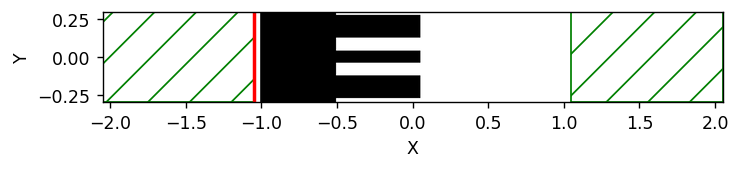

In [7]:
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    symmetries=symmetries,
    k_point = mp.Vector3(),
)


%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()

In [8]:
t_xx = (.532)
dt = (t_xx / 40)
t = 1000
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_down = -0.5 * sy + gp/2
y_obs_cen = -0.5 * sy + 3*gp/2
y_obs_up = 0.5 * sy - gp/2

print(int((t_xx)/dt))


40


In [ ]:

### ez_data_list = [[] for _ in range(int((t_xx)/dt))]

# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
ez_data_cen = []
ez_data_up = []
ez_data_down = []
###
def get_slice(sim):
    ez_data_cen.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_cen) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_up.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_up) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_down.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_down) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))

sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00177193 s
Working in 2D dimensions.
Computational cell is 4.1 x 0.6 x 0 with resolution 500
     block, center = (-0.76,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,0.4,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,1,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-0.25,-2.77556e-17,0)
          size (

In [ ]:
ez_data_up = np.array(ez_data_up)
ez_data_cen = np.array(ez_data_cen)
ez_data_down = np.array(ez_data_down)


print(len(ez_data_cen))

print(1 + int(round(t_xx/dt)))

In [ ]:
ez_data_cen = np.array(ez_data_cen)
ez_data_up = np.array(ez_data_up)
ez_data_down = np.array(ez_data_down)

#plt.subplot_adjust(hspace = .35)
plt.figure(dpi = 300)
start = round(len(ez_data_cen) / t *1)

for i in range(start,round(len(ez_data_cen) / 75),1):
    plt.subplot(3,1,1)
    plt.plot(i,ez_data_up[i],'k.')
    plt.subplot(3,1,2)
    plt.plot(i,ez_data_cen[i],'k.')
    plt.subplot(3,1,3)
    plt.plot(i,ez_data_down[i],'k.')
    if i ==  (len(ez_data_cen)-1):
        plt.subplot(3,1,1)
        plt.title('upper point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_up[i],'b .')
        plt.subplot(3,1,2)
        plt.title('center point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_cen[i],'b .')
        plt.subplot(3,1,3)
        plt.title('downer point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_down[i],'b .')


In [ ]:
index1_up = 0
index1_cen = 0
index1_down = 0

index2_up = 0
index2_cen = 0
index2_down = 0

period_max_up = 0
period_max_cen = 0
period_max_down = 0
period_next_max_up = 0
period_next_max_cen = 0
period_next_max_down = 0

initial_index = round(len(ez_data_cen) / t * 200 )
print(initial_index)

end_index = len(ez_data_cen) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)

In [ ]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_up[j])
        period_next.append(ez_data_up[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_up == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_up == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('upper point 到達誤差範圍內的所需 meep time unit' , 17690 / len(ez_data_up) * 500 , '\n')
        print('-----------------------------------------------------')
        break

        
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_cen[j])
        period_next.append(ez_data_cen[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_cen == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_cen == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t')
        print('center point 到達誤差範圍內的所需 meep time unit' , 53826 / len(ez_data_cen) * 500 , '\n')
        print('-----------------------------------------------------')
        break
        
    
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_down[j])
        period_next.append(ez_data_down[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- down point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- down point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_down == period_max)
        print(index1, '--- down point index1')
        index2 = np.where(ez_data_down == period_next_max)
        print(index2, '--- down point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('down point 到達誤差範圍內的所需 meep time unit' , 40267 / len(ez_data_down) * 500 , '\n')
        print('-----------------------------------------------------')
        break


In [ ]:
plt.figure(dpi = 150)
plt.title('Upper point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_up[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_up[i] , 'b.')
    if max_value < ez_data_up[i] :
        max_value = ez_data_up[i]

print(max_value)

In [ ]:
plt.figure(dpi = 150)
plt.title('center point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_cen[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_cen[i] , 'b.')
    if max_value < ez_data_cen[i] :
        max_value = ez_data_cen[i]

print(max_value)

In [ ]:
plt.figure(dpi = 150)
plt.title('downner point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_down[i] , 'b.')

# Following is Simulation that Cell height = 300 nm

In [ ]:
sim.reset_meep()
resolution = 500  # pixels/μm

dpml = 1.0  # PML thickness
dsub = 0.5  # substrate thickness
dcaa = 0.06  # air rigion for alpha structure
# alpha structure is that one period = 200nm，sigle cell width = 80nm locate at center
dcab = 0.025 # air rigion for beta structure 
# beta structure is that one period = 200nm，sigle cell width = 150nm locate at center
gp = 0.2  # grating periodicity
gh = 0.3  # grating height
gwa = 0.08 # alpha grating cell width
gwb = 0.15 # beta grating cell width

num_cells = 3 # number of grating unit cells

# air region thickness adjacent to grating
dair = 1 

wvl = 0.532  # center wavelength
fcen = 1 / wvl  # center frequency

glass = mp.Medium(index= 2.6678)

pml_layers = [mp.PML(thickness=dpml, direction = mp.X )]

symmetries = [mp.Mirror(mp.Y)]

sx = dpml + dsub + gh + dair + dpml
sy = num_cells*gp
#sy = ((dcaa + gwa + dcaa)*2 + (dcab + gwb + dcab))*num_cells
cell_size = mp.Vector3(sx, sy)

sources = [
    mp.Source(
        mp.ContinuousSource(frequency = 2), # frequemcy = 2原因是 meep 的 C=1，所以 1/? = 0.5 um，?即是2
        component = mp.Ez,
        center = mp.Vector3(-0.5 * sx + dpml ),
        size = mp.Vector3(y = sy),
    )
]

geometry = [
    mp.Block(
        material=glass,
        size=mp.Vector3(dsub, mp.inf, mp.inf),
        center=mp.Vector3(-0.5 * sx + dpml + 0.04 + dsub/2),
    )
]


for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp/2 + (j * 3 * gp),
                #-0.5 * sy + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwa, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + gp + gp/2  + (j * 3 * gp),
                #-0.5 * sy + gp + gp/2,
            ),
        )
    )
for j in range(num_cells):
    geometry.append(
        mp.Block(
            material=glass,
            size=mp.Vector3(gh, gwb, mp.inf),
            center=mp.Vector3(
                -0.5 * sx + dpml + dsub + 0.5 * gh,
                -0.5 * sy + 2*gp + gp/2  + (j * 3 * gp),
                #0.5 * sy - gp/2,
            ),
        )
    )




In [ ]:
k_point = mp.Vector3()  # Gamma 點表示週期邊界條件
k_points = [k_point]

sim = mp.Simulation(
    cell_size=cell_size,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
    symmetries=symmetries,
    k_point = mp.Vector3(),
)


%matplotlib inline
plt.figure(dpi = 125)
sim.plot2D()
plt.show()

In [ ]:
t_xx = (.532)
dt = (t_xx / 40)
t = 1000
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_down = -0.5 * sy + gp/2
y_obs_cen = -0.5 * sy + 3*gp/2
y_obs_up = 0.5 * sy - gp/2

print(int((t_xx)/dt))


In [ ]:

# 儲存場量數值的列表
ez_data_cen = []
ez_data_up = []
ez_data_down = []
###
def get_slice(sim):
    ez_data_cen.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_cen) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_up.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_up) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))
    ez_data_down.append(sim.get_array(center = mp.Vector3(x_obs,y_obs_down) , size = mp.Vector3(0,0) , component = mp.Ez , cmplx = True))

sim.run(mp.at_every(dt , get_slice) , until = t)

plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [ ]:
ez_data_up = np.array(ez_data_up)
ez_data_cen = np.array(ez_data_cen)
ez_data_down = np.array(ez_data_down)


print(len(ez_data_cen))

print(1 + int(round(t_xx/dt)))

In [ ]:
ez_data_cen = np.array(ez_data_cen)
ez_data_up = np.array(ez_data_up)
ez_data_down = np.array(ez_data_down)

#plt.subplot_adjust(hspace = .35)
plt.figure(dpi = 200)
start = round(len(ez_data_cen) / t *1)

for i in range(start,len(ez_data_cen),1):
    plt.subplot(3,1,1)
    plt.plot(i,ez_data_up[i],'k.')
    plt.subplot(3,1,2)
    plt.plot(i,ez_data_cen[i],'k.')
    plt.subplot(3,1,3)
    plt.plot(i,ez_data_down[i],'k.')
    if i ==  (len(ez_data_cen)-1):
        plt.subplot(3,1,1)
        plt.title('upper point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_up[i],'b .')
        plt.subplot(3,1,2)
        plt.title('center point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_cen[i],'b .')
        plt.subplot(3,1,3)
        plt.title('downer point')
        plt.xlim(start,len(ez_data_cen))
        plt.plot(ez_data_down[i],'b .')


In [ ]:
index1_up = 0
index1_cen = 0
index1_down = 0

index2_up = 0
index2_cen = 0
index2_down = 0

period_max_up = 0
period_max_cen = 0
period_max_down = 0
period_next_max_up = 0
period_next_max_cen = 0
period_next_max_down = 0

initial_index = round(len(ez_data_cen) / t * 200 )
print(initial_index)

end_index = len(ez_data_cen) - 2*( 1 +int(round(t_xx/dt))) 
print(end_index)
for i in range(initial_index , end_index):
    plt.plot(ez_data_cen[i])

In [ ]:

for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_up[j])
        period_next.append(ez_data_up[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_up == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_up == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('upper point 到達誤差範圍內的所需 meep time unit' , 23287 / len(ez_data_up) * 500 , '\n')
        print('-----------------------------------------------------')
        break

        
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_cen[j])
        period_next.append(ez_data_cen[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- upper point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- upper point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_cen == period_max)
        print(index1, '--- upper point index1')
        index2 = np.where(ez_data_cen == period_next_max)
        print(index2, '--- upper point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t')
        print('center point 到達誤差範圍內的所需 meep time unit' , 73397 / len(ez_data_cen) * 500 , '\n')
        print('-----------------------------------------------------')
        break
        
    
for i in range( initial_index , end_index , 1 + int(round(t_xx/dt)) ) :
    period = []
    period_next = []
    for j in range( i , i + 41 ) :
        period.append(ez_data_down[j])
        period_next.append(ez_data_down[j + (1 + round(t_xx/dt))])
    period_max = max(period)
    period_next_max = max(period_next)
    if (np.abs(period_max - period_next_max) < 10**(-6)) :
        print(period_max, '-------- down point one period 內最大振福')
        #print(period, '\n')
        print(period_next_max , '------- down point one next_period 內最大振福')
        #print(period_next, '\n')
        print(period_max - period_next_max , '----- 振幅誤差')
        index1 = np.where(ez_data_down == period_max)
        print(index1, '--- down point index1')
        index2 = np.where(ez_data_down == period_next_max)
        print(index2, '--- down point index2')
        print(period_max ,'\t' , period_next_max , '\t' , period_max - period_next_max , '\t' )
        print('down point 到達誤差範圍內的所需 meep time unit' , 18749 / len(ez_data_down) * 500 , '\n')
        print('-----------------------------------------------------')
        break


dt_ = str(dt)

In [ ]:
plt.figure(dpi = 150)
plt.title('Upper point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_up[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_up[i] , 'b.')
    if max_value < ez_data_up[i] :
        max_value = ez_data_up[i]
        
print(max_value)

In [ ]:
plt.figure(dpi = 150)
plt.title('center point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
max_value = ez_data_cen[73320]
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_cen[i] , 'b.')
    if max_value < ez_data_cen[i] :
        max_value = ez_data_cen[i]

print(max_value)

In [ ]:
plt.figure(dpi = 150)
plt.title('downner point')
plt.xlabel('time point (dt = )')
plt.ylabel('E - amplitude')
for i in range(73320 , 73397) : #len(ez_data_list)) :       
    plt.plot(i , ez_data_down[i] , 'b.')

In [ ]:
# 儲存場量數值的列表，定義為擁有 10 列的空二維陣列
ez_data_list = [[] for _ in range(int((time_end - time_start)/dt))]

# 遍歷每個時間步長，並檢查是否在指定的時間範圍內
t = time_start
for i in range(0 , int((time_end - time_start) / dt)):
    print(t)
    sim.run(until=t)
    # 取得 Ez 場量數值，並加入到對應的列表中
    ez_data_list[i].append(np.array(sim.get_array(component=mp.Ez, cmplx=True)))
    t = t + dt

# 將每一個列表轉換為 NumPy 數組
'''for i in range(0,int((time_end - time_start) / dt)):
    ez_data_list[i] = np.array(ez_data_list[i])
'''
plt.figure(dpi = 100)
sim.plot2D(fields=mp.Ez)
plt.show()

In [ ]:
# 這裡的 Code 單個觀測點 電場E - 時間t 的點狀圖

# 儲存振福資訊的列表，定義為擁有 10 列的空二維陣列
ez_amplitude_list = [[] for _ in range(int((time_end - time_start) / dt))]

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.002
y_obs_start = -0.5 * sy #+ gp/2
y_obs = y_obs_start

for i in range(0, int((time_end - time_start) / dt)):
    for j in range(300):
        y_obs = y_obs_start + (j * 0.002)
        # 計算觀測點在陣列中的索引位置
        x_index = int(round(x_obs * sim.resolution))
        y_index = int(round(y_obs * sim.resolution))
        # 取得振幅資訊
        amplitude = np.abs(ez_data_list[i - time_start][0][x_index, y_index])
        # 將振幅資訊加入到對應時間步長的列表中
        ez_amplitude_list[i].append(amplitude)

    
for i in range(0, int((time_end - time_start) / dt)):
    print(ez_amplitude_list[i])
    

In [ ]:
for i in np.arange(0, time_end - time_start, dt):
    print(ez_amplitude_list[i])

In [ ]:

# 取得 Ez 場量在指定位置的相位資訊
phase_data = np.fft.fft(np.array(sim.get_array(component = mp.Ez , cmplx = True)))

# 計算觀測點的相對座標
x_obs = -0.5 * sx + dpml + dsub + gh + 0.01
y_obs_start = -0.5 * sy + gp/2

# 儲存相位資訊的列表
phase_list = []

# 遍歷每個觀測點
for j in range(num_cells):
    y_obs = y_obs_start + (j * gp)
    # 計算觀測點在陣列中的索引位置
    x_index = int(round((x_obs) * sim.resolution))
    y_index = int(round((y_obs) * sim.resolution))
    # 取得相位資訊
    phase = np.angle(phase_data[x_index, y_index])
    phase_list.append(phase)

# 印出觀測點的相位資訊
'''
for j, phase in enumerate(phase_list):
    print(f"觀測點 {j+1} 的相位資訊: {phase}")'''
print(phase_list)

In [5]:
sim.reset_meep()
f = plt.figure(dpi = 125)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
plt.close()

sim.run(mp.at_every(1, Animate), until = 50)
plt.close()

filename = "2 beta alpha beta structure.mp4"
Animate.to_mp4(10, filename)

from IPython.display import Video
Video(filename)

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.000506878 s
Working in 2D dimensions.
Computational cell is 17.1 x 0.6 x 0 with resolution 50
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
time for set_epsilon = 0.0112 s
-----------


Meep: using complex fields.
     block, center = (-7.26,0,0)
          size (0.5,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,-2.77556e-17,0)
          size (0.6,0.08,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
     block, center = (-6.75,0.2,0)
          size (0.6,0.15,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (7.11716,7.11716,7.11716)
Normalizing field data...
run 1 finished at t = 50.0 (5000 timesteps)
Generating MP4...
